In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
connection = sqlite3.connect('data/jobs.db')

In [2]:
df = pd.read_sql("""
    SELECT
        *
    FROM
        jobs    """,con=connection)
df

,job_id,job_role,job_role_ext,post_title,post_url,company_name,company_url,country,location,job_type,salary,scrape_date,posted,info_remote,post_language,description
0,4cee71852246cd98,de,data engineer,Data Engineer (Remote),https://www.indeed.com/viewjob?jk=4cee71852246...,Collins Aerospace,https://www.indeed.com/cmp/Collins-Aerospace?c...,us,"Charlotte, NC",Full-time,None,2022-04-23,Posted Just posted,"Collins Aerospace - 3,129 reviews - Charlotte,...",en,\n\n\nCollins Aerospace is continuing to grow ...
1,245d0d6e3a8680e5,de,data engineer,Senior Staff Data Engineer - 100% Remote,https://www.indeed.com/viewjob?jk=245d0d6e3a86...,Stryker,https://www.indeed.com/cmp/Stryker-3?campaigni...,us,Illinois,None,None,2022-04-23,Posted today,"Stryker - 1,808 reviews - Illinois - Remote",en,Why join Stryker?\n\nWe are proud to be named ...
2,76031179131b0858,de,data engineer,SAP Data Engineer (Remote),https://www.indeed.com/viewjob?jk=76031179131b...,Collins Aerospace,https://www.indeed.com/cmp/Collins-Aerospace?c...,us,"Charlotte, NC",Full-time,None,2022-04-23,Posted Just posted,"Collins Aerospace - 3,129 reviews - Charlotte,...",en,\n\nCollins Aerospace is continuing to grow ou...
3,04f7fde92feb9b76,de,data engineer,Azure Data Engineer,https://www.indeed.com/viewjob?jk=04f7fde92feb...,The Coca-Cola Company,https://www.indeed.com/cmp/The-Coca--cola-Comp...,us,"Atlanta, GA 30313",Full-time,None,2022-04-23,Posted Just posted,"The Coca-Cola Company - 9,868 reviews - Atlant...",en,\n\n...\n Our Purpose and Growth Culture: We a...
4,a3510f5979c22922,de,data engineer,Lead Data Engineer - High Performance Computin...,https://www.indeed.com/viewjob?jk=a3510f5979c2...,TARGET,https://www.indeed.com/cmp/Target?campaignid=m...,us,"Sunnyvale, CA 94086",Full-time,None,2022-04-23,Posted today,"TARGET - 59,853 reviews - Sunnyvale, CA 94086 ...",en,\n\nAbout us:\n As a Fortune 50 company with m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,4a5e36aac12c116e,ds,data scientist,DATA ANALYST/DATA SCIENTIST,https://www.indeed.com/viewjob?jk=4a5e36aac12c...,Statworks (M) Sdn Bhd,https://www.indeed.com/cmp/Statworks-(m)-Sdn-B...,my,Petaling Jaya,"Full-time, Permanent",None,2022-04-26,Posted Today,Statworks (M) Sdn Bhd - Petaling Jaya,en,\nJob Scope\n\nWorking or knowledge in any rel...
2025,03b69efb9fcd0fe9,ds,data scientist,Senior Data Scientist,https://www.indeed.com/viewjob?jk=03b69efb9fcd...,NielsenIQ,https://www.indeed.com/cmp/Nielseniq?campaigni...,my,Petaling Jaya,Full-time,None,2022-04-26,Posted Today,NielsenIQ - 9 reviews - Petaling Jaya,en,\n\n Job Description\n You will work with a...
2026,d85275c69a9e409e,ds,data scientist,Senior Data Scientist,https://www.indeed.com/viewjob?jk=d85275c69a9e...,NielsenIQ,https://www.indeed.com/cmp/Nielseniq?campaigni...,my,Petaling Jaya,Full-time,None,2022-04-26,Posted Today,NielsenIQ - 9 reviews - Petaling Jaya,en,\n\n Job Description\n You will work with a...
2027,e9247f891cfbbeaa,ds,data scientist,Data Scientist,https://www.indeed.com/viewjob?jk=e9247f891cfb...,Nityo.com,https://www.indeed.com/cmp/Nityo.com?campaigni...,my,George Town,Full-time,None,2022-04-26,Posted Today,Nityo.com - George Town,en,\n\n\nSmart Manufacturing Data Scientist\n\n\n...


In [3]:
from wordcloud import WordCloud

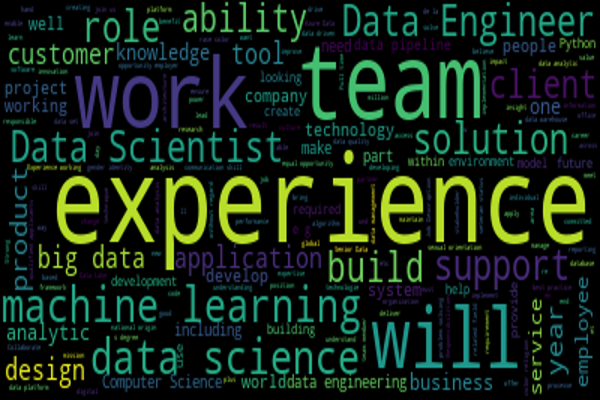

In [4]:
df = pd.read_sql("SELECT description FROM jobs",con=connection)
text_list = []
for index,row in df.iterrows():
    text_list.append(df.loc[index,'description'])
text = ' '.join(text_list)
wc = WordCloud().generate(text)
image = wc.to_image()
image = image.resize((600,400))
image

,company_name,posts
0,IBM,96
1,Comcentric,45
2,Shopify,43
3,"JPMorgan Chase Bank, N.A.",34
4,EY,34
5,Deloitte,30
6,General Motors,20
7,Visa,18
8,Micron,18
9,Amazon.com Services LLC,15


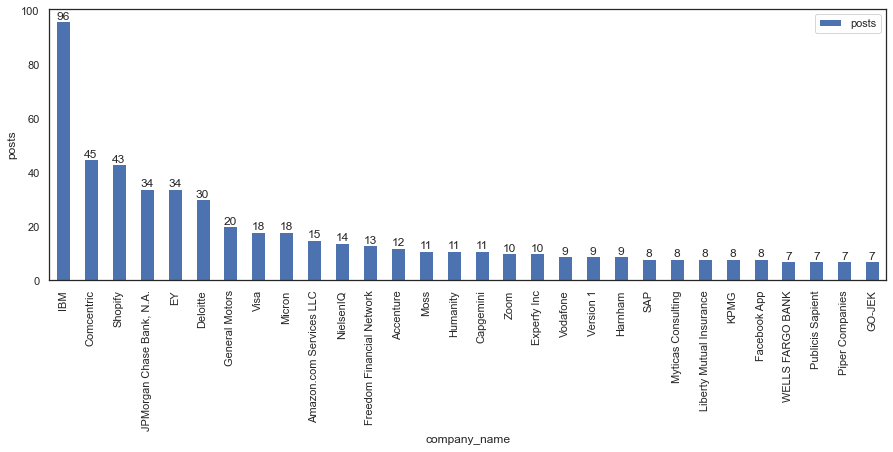

In [5]:
df = pd.read_sql("""
    SELECT
        company_name,
        COUNT(*) AS posts
    FROM
        jobs
    GROUP BY
        company_name
    ORDER BY
        COUNT(*) desc
    LIMIT
        30    """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
ax = df.plot(kind='bar', x='company_name', ylabel='posts', figsize=(15,5))
for container in ax.containers:
    ax.bar_label(container)
df

,de_posts,ds_posts
0,1238,791


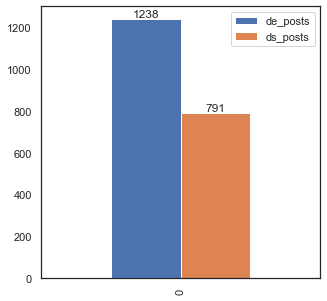

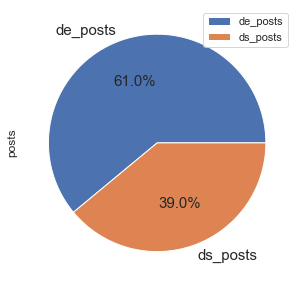

In [6]:
df = pd.read_sql("""
    SELECT
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs    """,con=connection)

sns.set_theme('notebook')
sns.set_style('white')

ax = df.plot(kind='bar', figsize=(5,5)) # use ax to then plot values
for container in ax.containers:
    ax.bar_label(container)
df[['de_posts','ds_posts']].T.plot(kind='pie', y=0, ylabel='posts', autopct='%1.1f%%', figsize=(5,5), fontsize=15) # Transpose and plot
df

,country,total_posts,de_posts,ds_posts
0,us,784,438,346
1,in,293,230,63
2,uk,139,81,58
3,de,118,73,45
4,fr,104,49,55
5,ca,82,48,34
6,sg,42,23,19
7,nl,38,24,14
8,pl,37,27,10
9,au,31,28,3


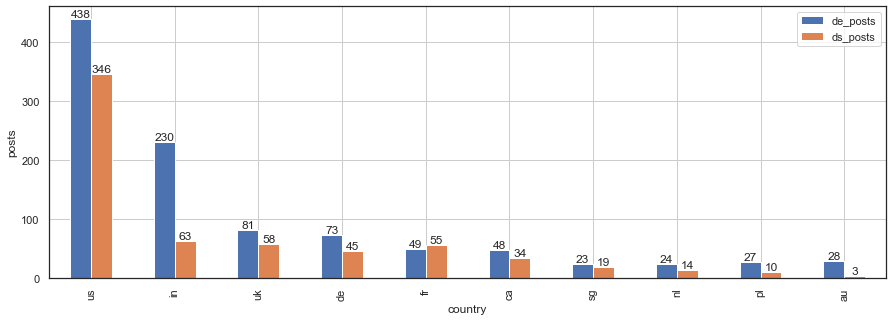

In [7]:
df = pd.read_sql("""
    SELECT
        country,
        COUNT(*) AS total_posts,
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs
    GROUP BY
        country
    ORDER BY
        count(*) DESC
    LIMIT
        10   """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
ax = df[['country','de_posts','ds_posts']].plot(kind='bar', x='country', figsize=(15,5), ylabel='posts', grid=True)
for container in ax.containers:
    ax.bar_label(container)
df

In [9]:
df = pd.read_sql("""
    SELECT
        scrape_date,
        COUNT(*)
    FROM
        jobs
    GROUP BY
        scrape_date
    ORDER BY
        scrape_date DESC   """,con=connection)
df

,scrape_date,COUNT(*)
0,2022-04-26,696
1,2022-04-25,269
2,2022-04-24,136
3,2022-04-23,928


job_role_ext,data engineer,data scientist
sql_percentage,76.7,63.8
python_percentage,67.4,83.3
cloud_percentage,61.1,28.1
spark_percentage,43.9,27.6
airflow_percentage,15.3,2.7


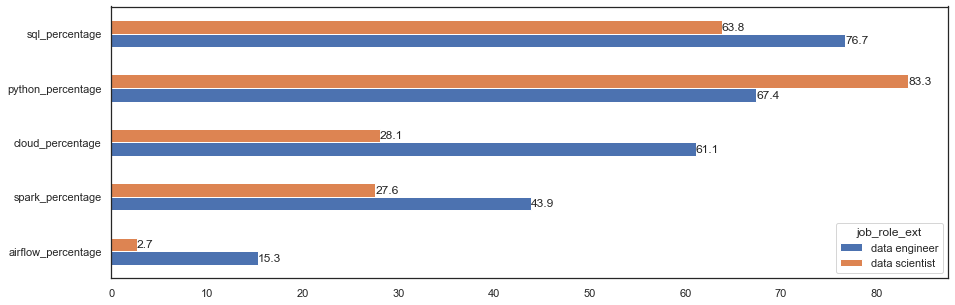

In [10]:
df = pd.read_sql("""
    SELECT
        job_role_ext,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%SQL%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS sql_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%PYTHON%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS python_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AIRFLOW%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS airflow_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AWS%' OR
            UPPER(description) LIKE '%GCP%' OR 
            UPPER(description) LIKE '%AZURE%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS cloud_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%SPARK%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS spark_percentage
    FROM
        jobs
    GROUP BY
        job_role_ext
    ORDER BY
        2 DESC
    LIMIT
        10   """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
df = df.set_index('job_role_ext').T.sort_values(by=['data engineer'], ascending=False) # Transpose to graph better
ax = df.sort_values(by=['data engineer']).plot(kind='barh', figsize=(15,5)) # sort back and print
for container in ax.containers:
    ax.bar_label(container)
df

In [11]:
connection.close()

wordcloud!!! and graphs. world map